The diffusion equation,
$$
\begin{aligned}
&\begin{aligned}
& \frac{\partial \bar{B}_r}{\partial t}= \eta_T\left( \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_r\right)\right]- \frac{\partial^2 \bar{B}_r}{\partial z^2}\right) , \\
& \frac{\partial \bar{B}_\phi}{\partial t}=\eta_T\left( \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_\phi\right)\right] - \frac{\partial^2 \bar{B}_\phi}{\partial z^2}\right) \\
\end{aligned}
\end{aligned}
$$



Applying the no-z approximation, rescaling the coordinate r with R0 and h with h0, the dimensionless equations to be solved are obtained:

$$
\begin{aligned}
&\begin{aligned}
& \frac{\partial \bar{B}_r}{\partial t}= \left(\frac{h_0}{R_0}\right)^2 \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_r\right)\right] - \frac{\pi^2 \bar{B}_r}{4}, \\
& \frac{\partial \bar{B}_\phi}{\partial t}=\left(\frac{h_0}{R_0}\right)^2 \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_\phi\right)\right] - \frac{\pi^2 \bar{B}_\phi}{4}\\
\end{aligned}
\end{aligned}
$$



# Boundary Conditions
$$
B_r(0)= 0 =Br(R_0)\\
B_\phi(0)=0 = B_\phi(R_0)\\
$$

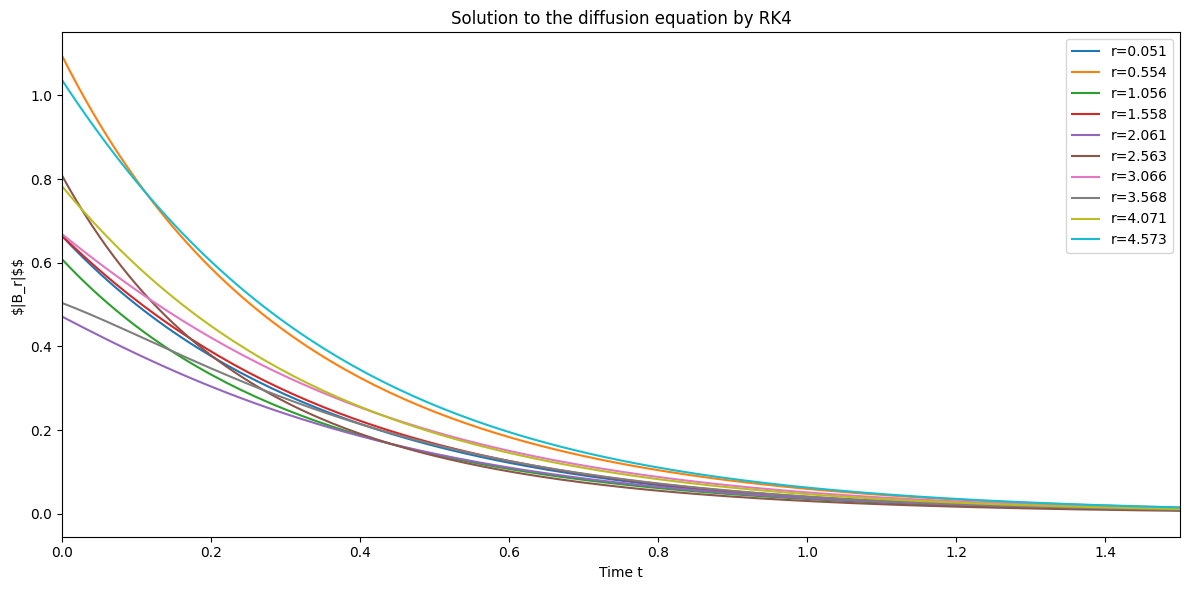

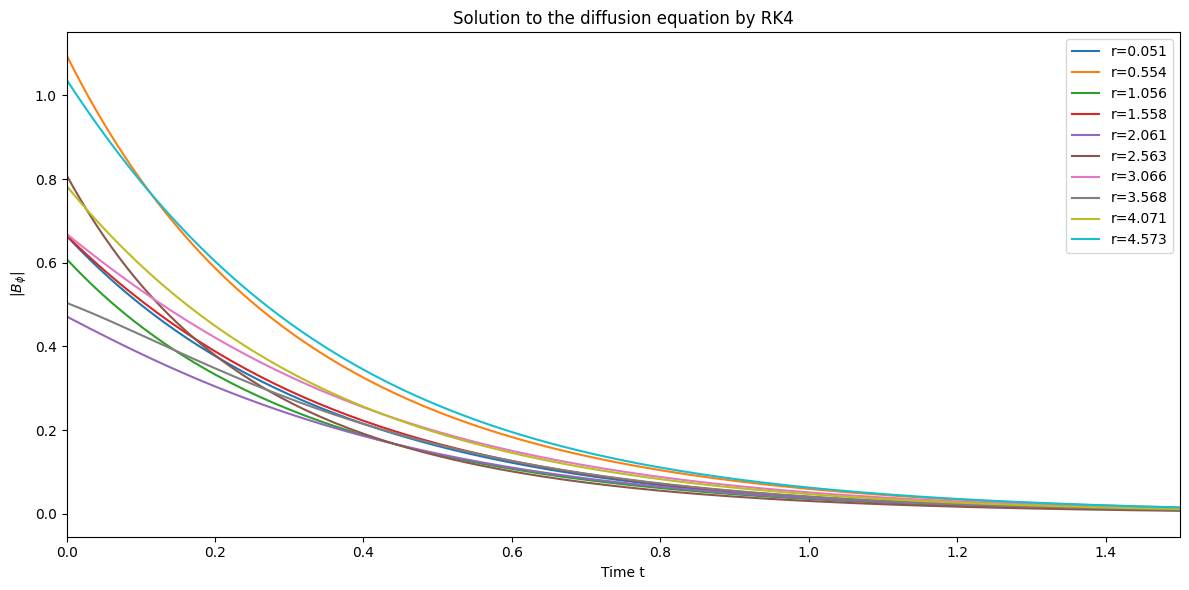

In [8]:
#Solving in r under the no-z approximation

import numpy as np

rmax=5
N_r=200
dr=rmax/(N_r-1)

#Grid
r=np.linspace(0.001, rmax, N_r)

#Seed field
freq = 2  #Frequency of the sinusoidal function
amplitude = 1  # Amplitude of the sinusoidal function
noise_level = 0.2  # Level of random noise to add
# Different possible functions, choose sine function with random noise
rand_sinfunc = amplitude * np.sin(2 * np.pi * freq * r) + np.random.normal(scale=noise_level, size=N_r)


#Choose seed
Bi= rand_sinfunc
Bphi=rand_sinfunc


#Define spatial derivatives
h0=0.5 #kpc
R0=10 #kpc
def cyl_laplacian_r(Bi):
    return (h0/R0)**2*np.gradient(np.gradient(r*Bi,dr)/r,dr)

#Timesteps
tmax=5.0
N_t=500
dt=tmax/N_t

#Define RK4
def RK4(dt,Binival):
    Bi=Binival
    
    k1=dt*(cyl_laplacian_r(Bi)-Bi*np.pi**2/4)
    k2=dt*(cyl_laplacian_r(Bi+k1/2)-(Bi+k1/2)*np.pi**2/4)
    k3=dt*(cyl_laplacian_r(Bi+k2/2)-(Bi+k2/2)*np.pi**2/4)
    k4=dt*(cyl_laplacian_r(Bi+k3)-(Bi+k3)*np.pi**2/4)

    return Bi + (k1 + 2*k2 + 2*k3 + k4)/6

#Array to store all values
sol_array=np.zeros((N_t,N_r))
sol_array_Bphi=np.zeros((N_t,N_r))

#Iterate through RK4
for t in range(N_t):
    Bi[0]=0
    Bi[-1]=0
    Bphi[0]=0
    Bphi[-1]=0
    sol_array[t,:]=np.copy(Bi)
    sol_array_Bphi[t,:]=np.copy(Bi)
    Bi=RK4(dt,Bi)
    Bphi=RK4(dt,Bphi)



from matplotlib import pyplot as plot
plot.figure(figsize=(12, 6))
plot.plot(np.linspace(0, tmax, N_t), np.abs(sol_array[:, 2::len(r)//10]))
#plot.plot(np.linspace(0, tmax, N_t), np.abs(sol_array[:, [12,13,14,15,16]]))
#plot.legend([f'r={r[i]:.3f}' for i in range(12,17)])
plot.legend([f'r={r[i]:.3f}' for i in range(2, len(r), len(r)//10)])
plot.xlabel('Time t')
plot.ylabel(r'$|B_r|$$')
plot.title("Solution to the diffusion equation by RK4")
plot.xlim(0,1.5)
#plot.ylim(0,.025)
plot.tight_layout()
plot.show()


plot.figure(figsize=(12, 6))
plot.plot(np.linspace(0, tmax, N_t), np.abs(sol_array_Bphi[:, 2::len(r)//10]))
#plot.plot(np.linspace(0, tmax, N_t), np.abs(sol_array[:, [12,13,14,15,16]]))
#plot.legend([f'r={r[i]:.3f}' for i in range(12,17)])
plot.legend([f'r={r[i]:.3f}' for i in range(2, len(r), len(r)//10)])
plot.xlabel('Time t')
plot.ylabel(r'$|B_\phi|$')
plot.title("Solution to the diffusion equation by RK4")
plot.xlim(0,1.5)
#plot.ylim(0,.025)
plot.tight_layout()
plot.show()

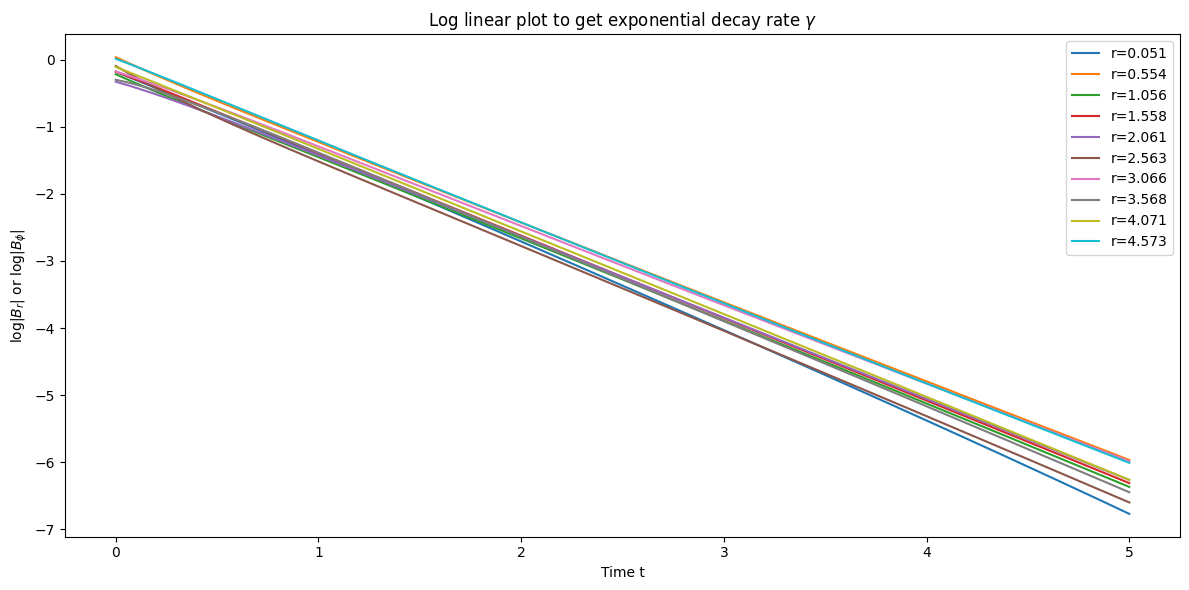

In [9]:
#Decay Rate vs. t

plot.figure(figsize=(12, 6))
plot.plot(np.linspace(0, tmax, N_t), np.log10(np.abs(sol_array[:, 2::len(r)//10])))
#plot.plot(np.linspace(0, tmax, N_t), np.abs(sol_array[:, [12,13,14,15,16]]))
#plot.legend([f'r={r[i]:.3f}' for i in range(12,17)])
plot.legend([f'r={r[i]:.3f}' for i in range(2, len(r), len(r)//10)])
plot.xlabel('Time t')
plot.ylabel(r'log$|B_r|$ or log$|B_\phi|$')
plot.title(r"Log linear plot to get exponential decay rate $\gamma$")
plot.tight_layout()
plot.show()

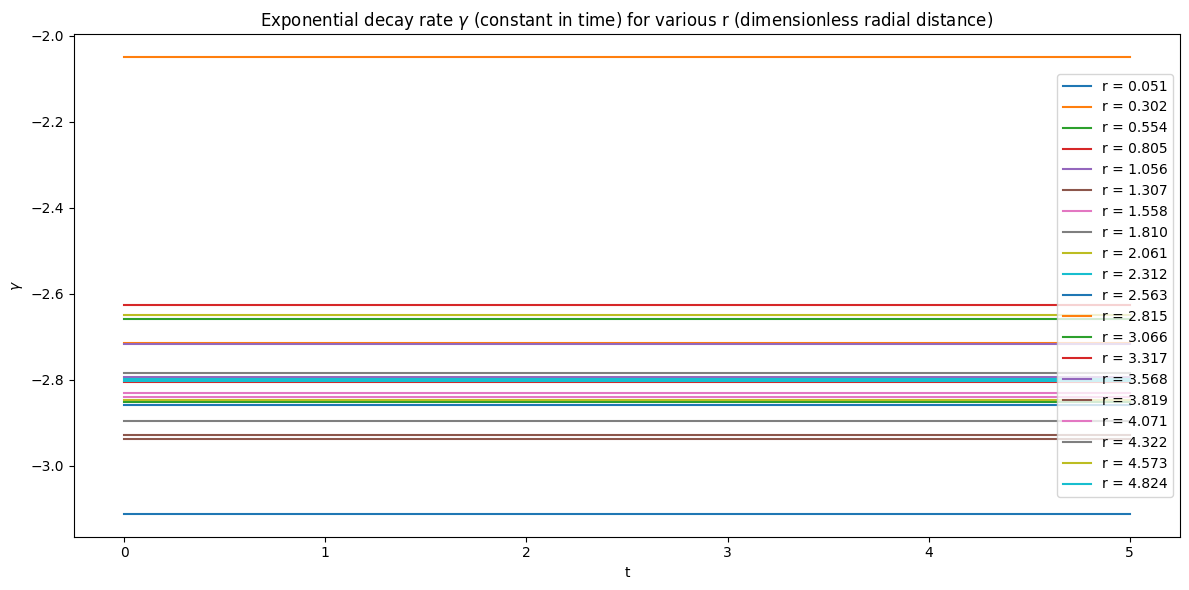

In [10]:
#Slope Calculation

#Calculate exp decay at the points,
t1posi=40
t1=0.4
t2posi=80
t2=0.8

#Find slopes (decay rates) at different r values
slopes=[]
rvals=[]
for i in range(2, len(r), len(r)//20):
    slope=(np.log10(np.abs(sol_array[t1posi,i]))-np.log10(np.abs(sol_array[t2posi,i])))/((t1-t2)*0.43429)
    slopes.append(slope)
    rvals.append(r[i])

tarray=np.linspace(0, tmax, N_t)

plot.figure(figsize=(12, 6))
for i in  range(len(slopes)):
    plot.plot(tarray,np.full_like(tarray, slopes[i]))
#plot.plot(np.linspace(0, tmax, N_t), np.abs(sol_array[:, [12,13,14,15,16]]))
#plot.legend([f'r={r[i]:.3f}' for i in range(12,17)])
plot.legend([f'r = {rvals[i]:.3f}' for i in range(len(rvals))])
plot.xlabel('t')
plot.ylabel(r'$\gamma$')
plot.title(r"Exponential decay rate $\gamma$ (constant in time) for various r (dimensionless radial distance)")
plot.tight_layout()
plot.show()

20


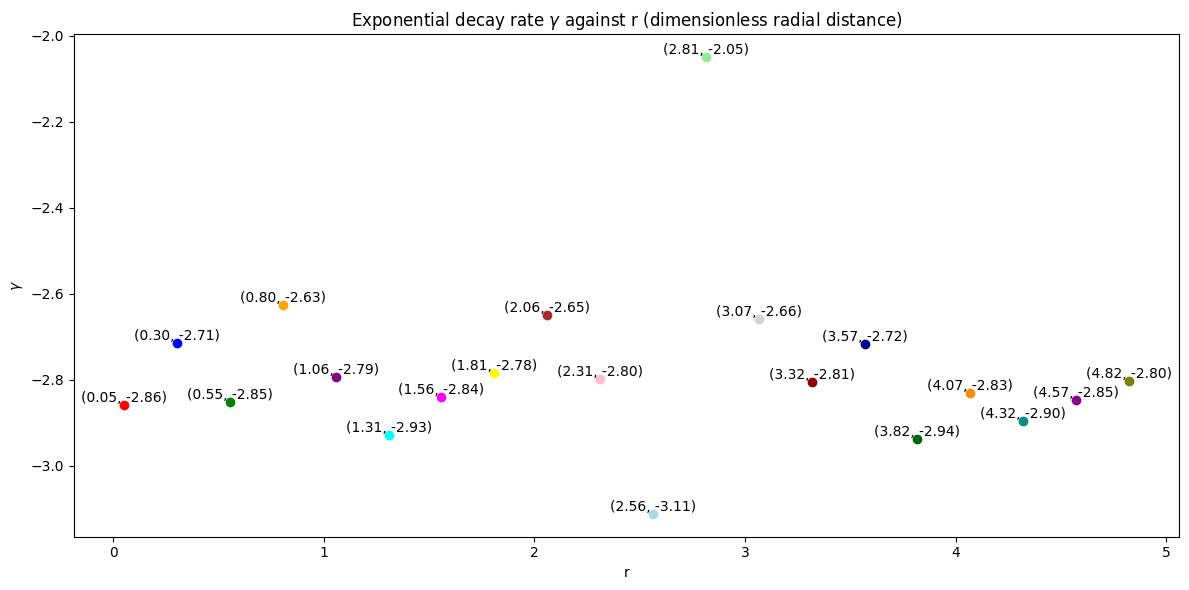

In [11]:
colors = [
    'red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink',
    'lightblue', 'lightgreen', 'lightgrey', 'darkred', 'darkblue', 'darkgreen', 'darkorange', 'darkcyan', 'darkmagenta',
    'olive', 'lime', 'teal', 'indigo', 'maroon', 'navy', 'forestgreen', 'chocolate', 'slategray', 'dodgerblue',
    '#FF5733', '#33FF57', '#5733FF', '#FF5733', '#33FF57', '#5733FF', '#FF5733', '#33FF57', '#5733FF', '#FF5733']


fig, ax = plot.subplots(figsize=(12, 6))
c=0

for i in range(len(rvals)):
    plot.scatter(rvals[i], slopes[i],color=colors[i])

# Add coordinates as labels for each point
for i, txt in enumerate(zip(rvals, slopes)):
    ax.text(txt[0], txt[1], f"({txt[0]:.2f}, {txt[1]:.2f})", ha="center", va="bottom")
    c=c+1
print(c)
plot.xlabel('r')
plot.ylabel(r'$\gamma$')
plot.title(r"Exponential decay rate $\gamma$ against r (dimensionless radial distance)")
plot.tight_layout()
plot.show()

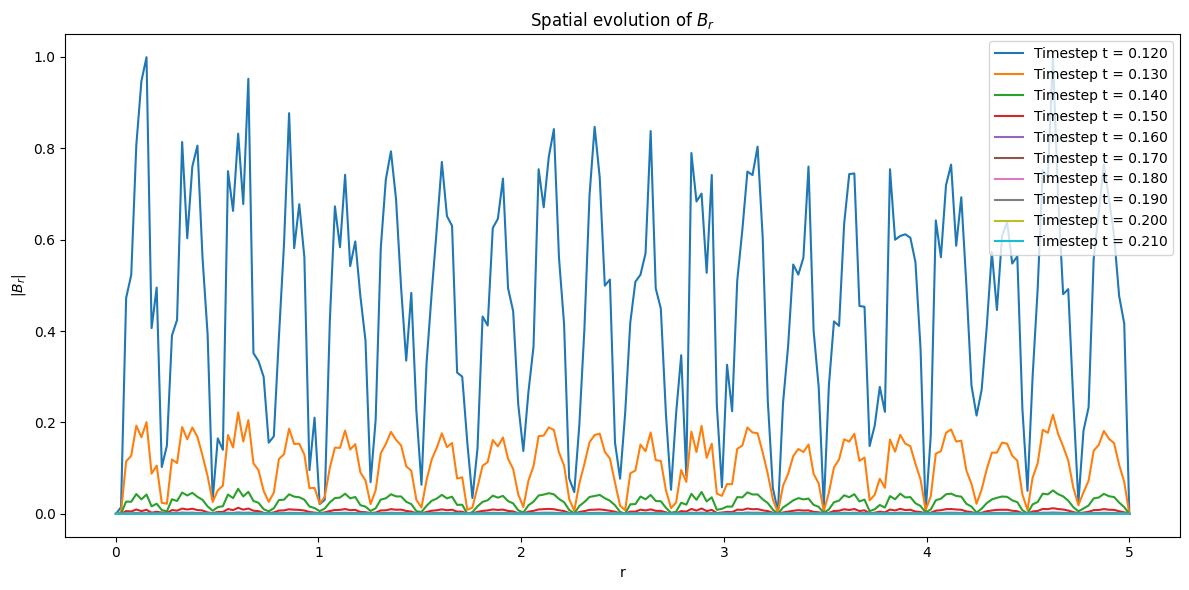

In [12]:
plot.figure(figsize=(12, 6))
plot.plot(r, np.abs(sol_array[12::len(tarray)//10, :].T))
#plot.plot(np.linspace(0, tmax, N_t), np.abs(sol_array[:, [12,13,14,15,16]]))
#plot.legend([f'r={r[i]:.3f}' for i in range(12,17)])
plot.legend([f'Timestep t = {tarray[i]:.3f}' for i in range(12, 23)])
plot.xlabel('r')
plot.ylabel(r'$|B_r|$')
plot.title(r"Spatial evolution of $B_r$")
#plot.xlim(0,1)
#plot.ylim(0,.025)
plot.tight_layout()
plot.show()

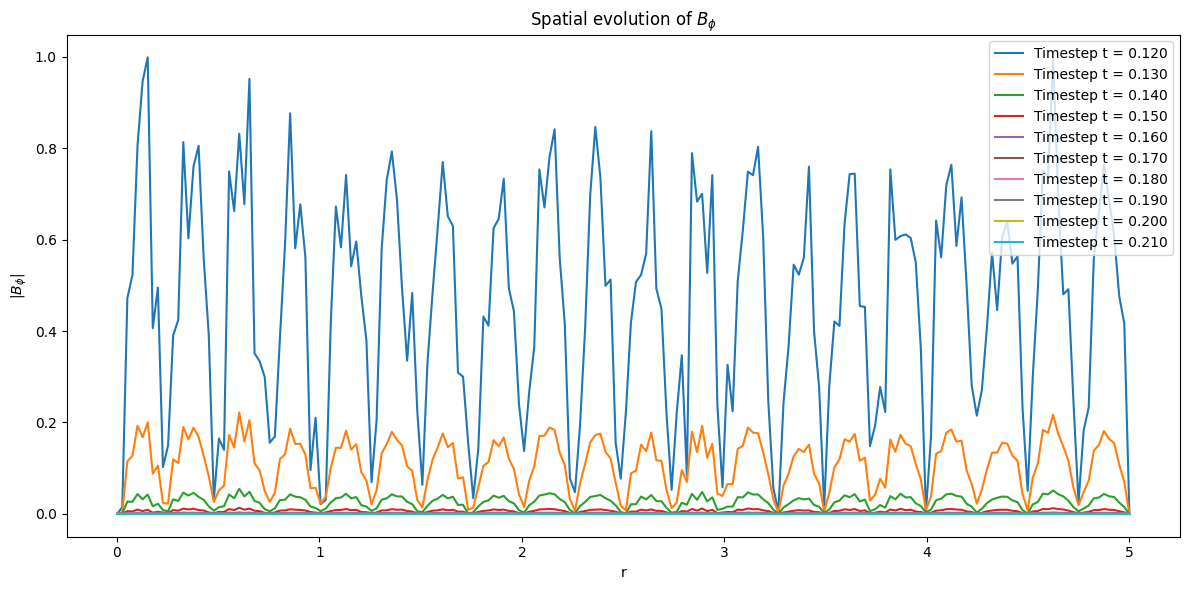

In [13]:
plot.figure(figsize=(12, 6))
plot.plot(r, np.abs(sol_array_Bphi[12::len(tarray)//10, :].T))
#plot.plot(np.linspace(0, tmax, N_t), np.abs(sol_array[:, [12,13,14,15,16]]))
#plot.legend([f'r={r[i]:.3f}' for i in range(12,17)])
plot.legend([f'Timestep t = {tarray[i]:.3f}' for i in range(12, 23)])
plot.xlabel('r')
plot.ylabel(r'$|B_\phi|$')
plot.title(r"Spatial evolution of $B_\phi$")
#plot.xlim(0,1)
#plot.ylim(0,.025)
plot.tight_layout()
plot.show()

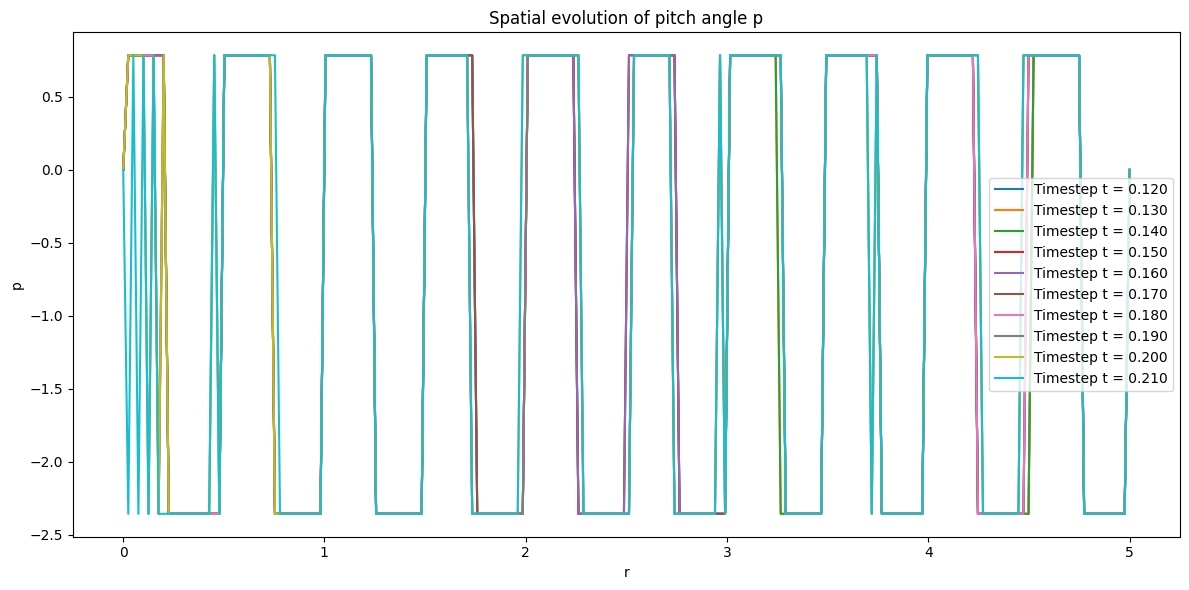

In [14]:
#Pitch Angle

plot.figure(figsize=(12, 6))
plot.plot(r, np.arctan2(sol_array[12::len(tarray)//10, :].T,sol_array_Bphi[12::len(tarray)//10, :].T))
#plot.plot(np.linspace(0, tmax, N_t), np.abs(sol_array[:, [12,13,14,15,16]]))
#plot.legend([f'r={r[i]:.3f}' for i in range(12,17)])
plot.legend([f'Timestep t = {tarray[i]:.3f}' for i in range(12, 23)])
plot.xlabel('r')
plot.ylabel('p')
plot.title(r"Spatial evolution of pitch angle p")
#plot.xlim(0,5)
#plot.ylim(0,.025)
plot.tight_layout()
plot.show()